In [30]:
import pandas as pd
import numpy as np
import sys
import os
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

core_dir = os.path.join(os.getcwd(), '..', 'daphme')
core_dir = os.path.normpath(core_dir)
sys.path.append(core_dir)

import pyarrow as pa
import pyarrow.parquet as pq
import s3fs
s3 = s3fs.S3FileSystem()
import seaborn as sns
from functools import partial

Matplotlib is building the font cache; this may take a moment.


In [106]:
import multiprocessing
from multiprocessing import Pool

In [15]:
!pip install geopandas
#!pip install pgeocode
import geopandas as gpd
import shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 8.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 89.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 40.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 115.9 MB/s eta 0:00:00


In [40]:
# import json
# grfs = []
# for root, folder, files in os.walk('../State-zip-code-GeoJSON/'):
#     for file in files:
#         if(file[-4:] == 'json'):
#             print(os.path.join(root, file))
#             with open(os.path.join(root, file), 'r') as f:
#                 gj =  json.load(f)
#             gf = gpd.GeoDataFrame.from_features(gj['features'])
#             grfs.append(gf)
#gfs = pd.concat(grfs)
#gfs = gfs.reset_index(drop = True)
#gfs.to_csv("geo_test.csv")

#table = gfs.to_parquet('zip_data_lisner_1.parquet')
#parquet_table = pq.read_table('zip_data_lisner_1.parquet')
#pq.write_to_dataset(parquet_table, root_path='s3://phl-pings/gravy_clean/zip_data_lisner_1')

../State-zip-code-GeoJSON/hi_hawaii_zip_codes_geo.min.json
../State-zip-code-GeoJSON/fl_florida_zip_codes_geo.min.json
../State-zip-code-GeoJSON/va_virginia_zip_codes_geo.min.json
../State-zip-code-GeoJSON/de_delaware_zip_codes_geo.min.json
../State-zip-code-GeoJSON/in_indiana_zip_codes_geo.min.json
../State-zip-code-GeoJSON/ny_new_york_zip_codes_geo.min.json
../State-zip-code-GeoJSON/ne_nebraska_zip_codes_geo.min.json
../State-zip-code-GeoJSON/ca_california_zip_codes_geo.min.json
../State-zip-code-GeoJSON/mo_missouri_zip_codes_geo.min.json
../State-zip-code-GeoJSON/wi_wisconsin_zip_codes_geo.min.json
../State-zip-code-GeoJSON/nh_new_hampshire_zip_codes_geo.min.json
../State-zip-code-GeoJSON/nm_new_mexico_zip_codes_geo.min.json
../State-zip-code-GeoJSON/mn_minnesota_zip_codes_geo.min.json
../State-zip-code-GeoJSON/nv_nevada_zip_codes_geo.min.json
../State-zip-code-GeoJSON/tx_texas_zip_codes_geo.min.json
../State-zip-code-GeoJSON/al_alabama_zip_codes_geo.min.json
../State-zip-code-GeoJS

In [95]:
zip_df = pq.read_table('s3://phl-pings/gravy_clean/'+'zip_data_lisner_1').to_pandas()
s = gpd.GeoSeries.from_wkb(zip_df.geometry)
gfs2 = gpd.GeoDataFrame(data=zip_df, geometry=s)

In [99]:
gfs2

,geometry,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10
0,"POLYGON ((-155.73004 19.14843, -155.72991 19.1...",15,96737,1596737,B5,G6350,S,333249259,32409257,+19.0645167,-155.7796715,N
1,"POLYGON ((-155.04807 19.64765, -155.04785 19.6...",15,96749,1596749,B5,G6350,S,162781816,9936836,+19.6212822,-154.9897354,N
2,"POLYGON ((-155.52145 20.06512, -155.52525 20.0...",15,96727,1596727,B5,G6350,S,325796343,37663705,+20.1099427,-155.6362714,N
3,"POLYGON ((-155.17739 19.90433, -155.17698 19.9...",15,96773,1596773,B5,G6350,S,90153110,7160687,+19.8801617,-155.2391612,N
4,"POLYGON ((-157.76267 21.44412, -157.763 21.444...",15,96734,1596734,B5,G6350,S,56282056,8182798,+21.3950837,-157.7581880,N
...,...,...,...,...,...,...,...,...,...,...,...,...
33087,"POLYGON ((-81.438 38.72431, -81.43814 38.72425...",54,25276,5425276,B5,G6350,S,440208942,403142,+38.7819129,-081.3287840,N
33088,"POLYGON ((-81.35751 38.55662, -81.35762 38.556...",54,25286,5425286,B5,G6350,S,178406908,0,+38.6151989,-081.4079854,N
33089,"POLYGON ((-81.25798 38.58128, -81.25791 38.581...",54,25251,5425251,B5,G6350,S,38453831,0,+38.6205246,-081.2363227,N
33090,"POLYGON ((-80.90115 37.78125, -80.90156 37.781...",54,25977,5425977,B5,G6350,S,12734903,400486,+37.7984778,-080.9033022,N


In [100]:
gfs[gfs.contains(shapely.Point(-75.200109, 39.953054))]

,geometry,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10
17747,"POLYGON ((-75.2086 39.94545, -75.20887 39.9452...",42,19104,4219104,B5,G6350,S,7786929,332009,+39.9587188,-075.1990688,N


In [109]:
s3_path = 's3://phl-pings/gravy_clean'
d_init = date(2019, 10, 7)
vals = list(range(31))
vals = list(map(lambda x: (d_init + timedelta(days=x)).isoformat(), vals))
vals = list(map(lambda x: f'{s3_path}/date={x}/', vals))

In [108]:
def get_users(x):
    #print(x)
    return pq.read_table(x, columns=['identifier']).column('identifier').unique().to_pandas()

def get_user_data(x, users):
    #print(x)
    return pq.read_table(x, filters=[('identifier', 'in', users)]).to_pandas()

## Extract a sample of 40000 users from 31 days

In [110]:
datas = []
with Pool(multiprocessing.cpu_count()) as p:
        datas.extend(p.map(get_users, vals))
all_users = pd.concat(datas).drop_duplicates()
all_users = all_users.rename('identifier')
all_users = all_users.apply(str)
all_users = all_users.sample(40000)

datas = []
with Pool(multiprocessing.cpu_count()) as p:
        datas.extend(p.map(partial(get_user_data, users=all_users), vals))
sample_data = pd.concat(datas).drop_duplicates()

In [ ]:
#can define the following:
#   latidude
#   longitude

import constants

class data_reader():
    def __init__(self, path, schema={}):
        
        if constants.latitude in schema:
            self.lat = schema["latidute"]
        else:
            self.lat = constants.latitude

        if constants.longitude in schema:
            self.long = schema["longitude"]
        else:
            self.long = constants.longitude
        
        self.frame = read(path)

    def read(self, path):


    def get_coords(self):
        return self.frame[[self.lat, self.long]]
    
reader = data_reader(path, schema)
reader.get_coords()
        

In [104]:
sample_data

NameError: name 'sample_data' is not defined

In [ ]:
gpd.geoseries

In [33]:
geopandas

{'x': -23.44632203947017, 'y': 13.509559830556421}

In [42]:
p_test = shapely.Point(*(sample_data.iloc[0][['x','y']]/(100*60*60)).astype(float).to_dict().values())

In [48]:
zip_locs.contains(p_test)

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Length: 79, dtype: bool

## Subset data to sample of users

In [13]:
# persist
#sample_data = pd.concat(output_data, ignore_index=True)
#pq.write_table(table, f's3://robustness-project/data_sample_40k.parquet', filesystem=s3)

AttributeError: 'Series' object has no attribute 'columns'

# Incompleteness metrics

In [114]:
sample_data

,identifier,local_timestamp,mercator_coord,x,y,in_geo,date_hour,day_of_week
0,66589a8a-7d3b-386d-bce0-c57808cc4c09,2019-10-07 20:17:22,b'\x12\x00\x00\x00\x01\x00\x00\x000\xd38\xf0H\...,-8.403528e+06,4.954759e+06,False,2019-10-07 20,2
1,66589a8a-7d3b-386d-bce0-c57808cc4c09,2019-10-07 20:17:35,b'\x12\x00\x00\x00\x01\x00\x00\x00\xfa\x04k\x0...,-8.367196e+06,4.859016e+06,True,2019-10-07 20,2
2,f692a8a1-1deb-3ad9-b432-156a0a0e7b73,2019-10-07 19:22:06,b'\x12\x00\x00\x00\x01\x00\x00\x00\x17\x84\xb6...,-8.362251e+06,4.871176e+06,True,2019-10-07 19,2
3,f692a8a1-1deb-3ad9-b432-156a0a0e7b73,2019-10-07 20:22:08,b'\x12\x00\x00\x00\x01\x00\x00\x00\x17\x84\xb6...,-8.362251e+06,4.871176e+06,True,2019-10-07 20,2
4,5ea6d204-07c5-33f4-b5a9-168de2ab9b06,2019-10-07 06:53:49,b'\x12\x00\x00\x00\x01\x00\x00\x00\xfc}\x80\xf...,-8.347160e+06,4.827563e+06,False,2019-10-07 06,2
...,...,...,...,...,...,...,...,...
244969,2b64dedf-4a2c-323d-8813-7cacd464f650,2019-11-06 09:04:52,b'\x12\x00\x00\x00\x01\x00\x00\x00\xe8\xd0\x92...,-8.431413e+06,4.863323e+06,False,2019-11-06 09,4
244970,2b64dedf-4a2c-323d-8813-7cacd464f650,2019-11-06 11:06:39,b'\x12\x00\x00\x00\x01\x00\x00\x00\xe8\xd0\x92...,-8.431413e+06,4.863323e+06,False,2019-11-06 11,4
244971,2b64dedf-4a2c-323d-8813-7cacd464f650,2019-11-06 11:06:53,b'\x12\x00\x00\x00\x01\x00\x00\x00\xe8\xd0\x92...,-8.431413e+06,4.863323e+06,False,2019-11-06 11,4
244972,2b64dedf-4a2c-323d-8813-7cacd464f650,2019-11-06 11:07:10,b'\x12\x00\x00\x00\x01\x00\x00\x00\xe8\xd0\x92...,-8.431413e+06,4.863323e+06,False,2019-11-06 11,4


## Barcode plots for different users

In [12]:
sample_data

,identifier
109935,dce99cb2-1d07-3bfd-9b05-646405a19f92
15314,a7632c4b-9d06-3d47-b934-e6a69ae21942
387452,2e5c7d1b-b29b-3cb0-8fbb-eb03f1cca6d0
309970,76c29820-0ce6-30f2-ba0b-9cf9ce0a3300
461517,75a4b0b4-32b0-3906-9b1c-0094059b5b65
...,...
148842,5463b83f-5443-3171-9555-db776f28f219
110283,71c603d5-904c-379f-aae9-427591a4fb03
200623,d09bdf8b-eee9-3c7c-a221-2fed88b32013
128925,6768def3-ed60-3d96-9845-04810b537b1b


In [39]:
print(len(sample_data))
print(len(sample_data.drop_duplicates(['identifier', 'date_hour'])))

6273142
495886


In [40]:
# Plot barcodes
week1 = ('2019-10-08', '2019-10-15')
week2 = ('2019-10-15', '2019-10-22')
week3 = ('2019-10-22', '2019-10-29')
week4 = ('2019-10-29', '2019-11-05')

In [41]:
#select a user with 20 hours in a whole month
hour_counts = sample_data.groupby(['identifier']).date_hour.count()

In [42]:
user1 = hour_counts.loc[(hour_counts>100)&(hour_counts<600)].index[-1]
user2 = hour_counts.loc[(hour_counts>100)&(hour_counts<900)].index[0]
user3 = hour_counts.loc[(hour_counts>100)&(hour_counts<1000)].index[2]
hour_counts[[user1,user2,user3]]

identifier
fff44402-7d12-32a0-9d7c-396dfdd97e00    299
0009925f-a0d6-44af-8373-19c1919af8b4    191
00702fae-be72-3518-b966-5a4ada97eeda    109
Name: date_hour, dtype: int64

In [43]:
def plot_user_timeframe(sample_data, user, start, end, ax=None):
    # If no Axes is passed in, create one
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 1))  # Aspect ratio 10:1

    df = sample_data.loc[(sample_data['identifier'] == user) & 
                         (sample_data['local_timestamp'] > start) & 
                         (sample_data['local_timestamp'] < end)].copy()
    df['day_of_week'] = df['local_timestamp'].dt.dayofweek + df['local_timestamp'].dt.hour / 24.0 + df['local_timestamp'].dt.minute / 1440.0
    #plotting
    ax.hlines(1, 0, 6, color='gray', linewidth=2)
    ax.vlines(df['day_of_week'], 0.95, 1.05, color='gray', linewidth=5, alpha=0.08)
    ax.vlines(df['day_of_week'], 0.95, 1.05, color='gray', linewidth=10, alpha=0.08)
    ax.vlines(df['day_of_week'], 0.95, 1.05, color='black', linewidth=0.5)
    # Set x-axis details
    ax.set_xlim(0, 6)
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    #ax.xaxis.set_label_coords(0.5, -0.5)
    #y-axis
    ax.yaxis.set_visible(False)
    [spine.set_visible(False) for spine in ax.spines.values()]    
    # Title with number of records
    ax.set_title(f"User {user[-4:]}, N={len(df)}, week={start}", fontsize=10, pad=10)
    return ax

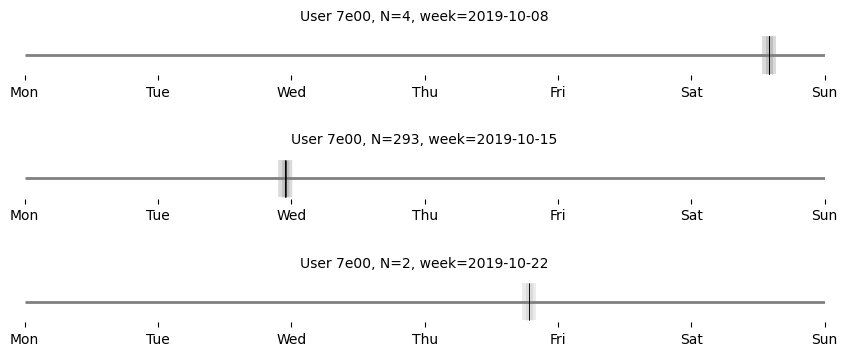

In [45]:
fig, axs = plt.subplots(3, 1, figsize=(10, 3.6))  # for 2 plots, one above the other
plot_user_timeframe(sample_data, user1, week1[0], week1[1], ax=axs[0])
plot_user_timeframe(sample_data, user1, week2[0], week2[1], ax=axs[1])
plot_user_timeframe(sample_data, user1, week3[0], week3[1], ax=axs[2])

fig.subplots_adjust(hspace=2.0, wspace=0.4, top=1.8, bottom=1.0, left=0.1, right=0.9)
#plt.savefig('user1.png')
plt.show()

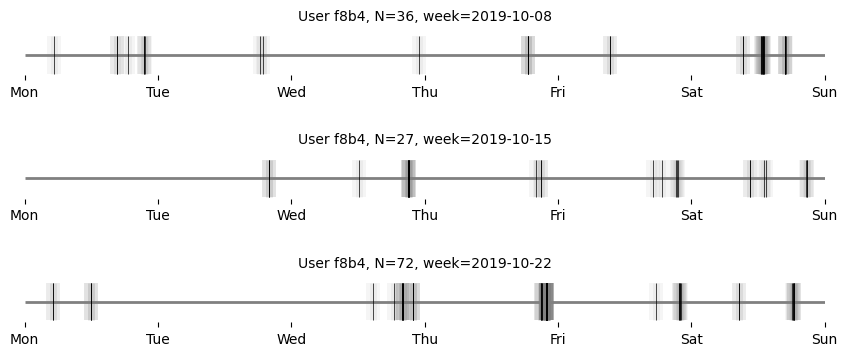

In [47]:
fig, axs = plt.subplots(3, 1, figsize=(10, 3.6))  # for 2 plots, one above the other
plot_user_timeframe(sample_data, user2, week1[0], week1[1], ax=axs[0])
plot_user_timeframe(sample_data, user2, week2[0], week2[1], ax=axs[1])
plot_user_timeframe(sample_data, user2, week3[0], week3[1], ax=axs[2])

fig.subplots_adjust(hspace=2.0, wspace=0.4, top=1.8, bottom=1.0, left=0.1, right=0.9)
#fig.savefig('./user2.png')
plt.show()

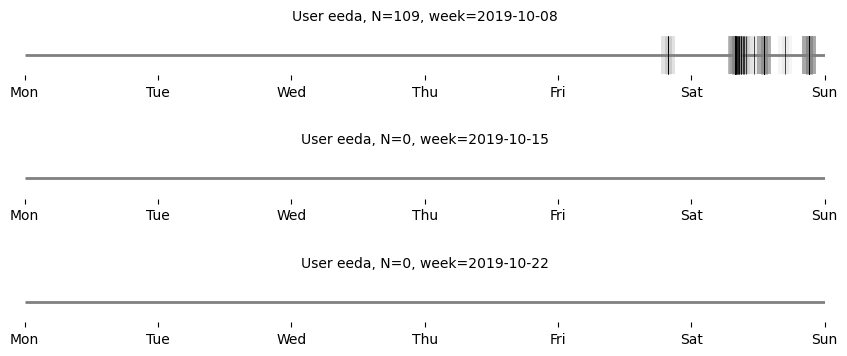

In [49]:
fig, axs = plt.subplots(3, 1, figsize=(10, 3.6))  # for 2 plots, one above the other
plot_user_timeframe(sample_data, user3, week1[0], week1[1], ax=axs[0])
plot_user_timeframe(sample_data, user3, week2[0], week2[1], ax=axs[1])
plot_user_timeframe(sample_data, user3, week3[0], week3[1], ax=axs[2])

fig.subplots_adjust(hspace=2.0, wspace=0.4, top=1.8, bottom=1.0, left=0.1, right=0.9)
#fig.savefig('./user3.png')
plt.show()

## q score for each week

In [50]:
start, end = week1

window = sample_data.loc[(sample_data['local_timestamp'] > start) & 
                         (sample_data['local_timestamp'] < end)].drop_duplicates(['identifier', 'date_hour'])
user_hours = window.groupby(['identifier']).date_hour.count()

In [51]:
user_hours[(user_hours>=3)]

identifier
0009925f-a0d6-44af-8373-19c1919af8b4     15
000df3d0-3a64-32f8-830f-492dac3bf659     10
0010e096-8ab5-35b8-baac-8a176d5a432c      3
00205dc6-586a-308f-be7b-1eab43959bdf      4
00389e47-0f1b-3687-a92f-b160fcbf97ec      6
                                       ... 
ffd9d910-d79f-3008-9691-3f6710ffd2fd      3
ffe945a7-447d-46cc-a64a-dca6a60d7941      3
ffe9a9e9-8099-33f3-b637-a0683bfa2850    163
ffea6c16-fbfc-3ec8-9cf9-ca999ad93a34      5
ffec687d-0ed3-3935-bf27-30033f57f8b5     14
Name: date_hour, Length: 6487, dtype: int64

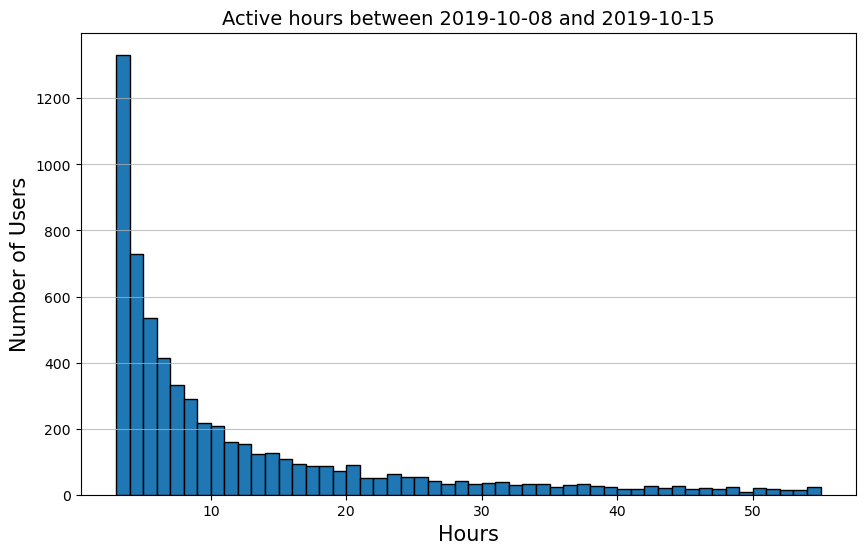

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(user_hours[(user_hours>=3)], bins=range(3, 56), edgecolor='black')  # 168 bins
plt.title(f'Active hours between {start} and {end}', fontsize=14)  # Incorporate start and end into the title
plt.xlabel('Hours', fontsize=15)  # Increase font size for x-axis label
plt.ylabel('Number of Users', fontsize=15)  # Increase font size for y-axis label
plt.grid(axis='y', alpha=0.75)

# Save the figure
#plt.savefig('./histogram.png')

# Show the plot
plt.show()

/tmp/ipykernel_13122/2489615241.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normalized_hours, shade=True, color="blue", linewidth=1.5)


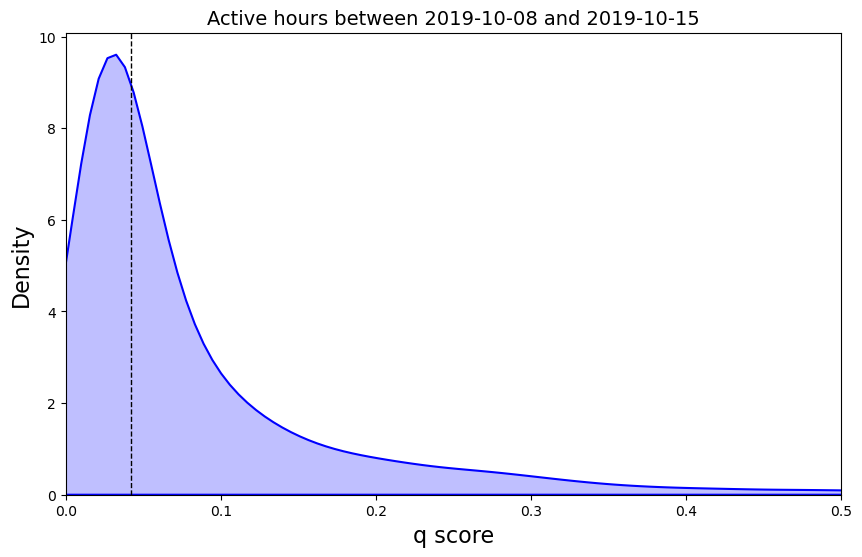

In [53]:
normalized_hours = user_hours[(user_hours>=3)] / 168

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(normalized_hours, shade=True, color="blue", linewidth=1.5)

# Calculate and plot the median line within the specified range
median_value = normalized_hours.median()
plt.axvline(median_value, color='black', linestyle='dashed', linewidth=1)



# Set title and labels with increased font size
plt.title(f'Active hours between {start} and {end}', fontsize=14)
plt.xlabel('q score', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Limit the range of x-axis to be between 0 and 0.4
plt.xlim(0, 0.5)

# Save the figure
#plt.savefig('normalized_hours_density.png')

# Show the plot
plt.show()